<a href="https://colab.research.google.com/github/asakata0821/Aisa_INFO5731_-Fall2023/blob/main/Sakata_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install demoji
!pip install textblob

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Fetched 2,979 kB in 2s (1,213 kB/s)
Reading package lists... Done
Reading

In [2]:
#Dataset from Assignment2
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

all_list = []

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/118.0'
}

url = 'https://www.imdb.com/title/tt1745960/reviews?sort=submissionDate&dir=desc&ratingFilter=0'

driver.get(url)

while True:
    try:
        load_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))
        )
        load_more_button.click()
    except Exception as e:
        #Till all reviews are shown
        print("No more reviews to load.")
        break

response = driver.page_source

driver.quit()

#webscraping
soup = BeautifulSoup(response, 'html.parser')
result = soup.find_all(class_='review-container')

#Collecting usernames
for item in result:
  namepart = item.find(class_='display-name-link')
  if namepart:
      username = namepart.a.get_text()

#Collecting post date
  datepart = item.find(class_='review-date')
  if datepart:
      date = datepart.get_text()

#Collecting the header of each review
  titlepart = item.find(class_='title')
  if titlepart:
      title = titlepart.get_text()

#Collecting the review contents
  reviewpart = item.find(class_='text show-more__control')
  if reviewpart:
      review = reviewpart.get_text()

  all_list.append({
      'Username': username,
      'Review Date': date,
      'Title': title,
      'Review': review
  })



No more reviews to load.


In [23]:
import pandas as pd
main_df = pd.DataFrame(all_list)
reviews = main_df['Review']
main_df

,Username,Review Date,Title,Review
0,randomduck,15 November 2023,A true blockbuster\n,This movie was a passion project by Tom cruise...
1,willphelan,11 November 2023,Best movie of 2022\n,Top Gun Maverick is everything a sequel should...
2,christiankennedy-70109,3 November 2023,Very Good Film\n,Top Gun Maverick is everything a sequel should...
3,halcyonedit,15 October 2023,A breath of fresh air\n,"""Maverick"" had me hooked from start to finish,..."
4,MartinHofmann,14 October 2023,High Octane Spectacle\n,"""Maverick"" had me hooked from start to finish,..."
...,...,...,...,...
4252,luismr_,23 May 2022,10/10 Cinematic Experience\n,Tom Cruise at its best. One-of-a-kind experien...
4253,tom-hobson15,23 May 2022,All hail Tom Cruise!\n,Tom Cruise at its best. One-of-a-kind experien...
4254,Top_Dawg_Critic,23 May 2022,The truly epic blockbuster we needed.\n,"Wow. The first Top Gun is a classic, and as we..."
4255,illmor-814-204784,23 May 2022,THE GODFATHER 2 FOR TOP GUN\n,Is well known that sequels usually are not wor...


In [4]:
import re
import nltk
from nltk.corpus import stopwords
import demoji
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer

In [5]:
#Basic text preprocessing (removal and lowercasing)
def clean_text(text):
    words = text.split()

    cleaned_words = [word for word in words if not word.startswith('@')]
    text = ' '.join(cleaned_words)

    #Remove hyperlinks
    cleaned_words = [word for word in words if not word.startswith('http')]
    text = ' '.join(cleaned_words)

    #Lowercasing
    text = text.lower()

    #Remove emojis
    text = demoji.replace(text, '')

    #Remove punctuations
    for i in punctuations:
        text = text.replace(i, '')

    #Remove numerical chars
    text = ''.join(i for i in text if not i.isdigit())

    #Remove stopwords
    text = ' '.join(i for i in text.split() if i not in stopword)

    return text


In [6]:
#Defining resouces required for preprocessing texts
punctuations = [',', '.', ':', ';', '!', '?', '(', ')', '[', ']', '{', '}', '’', '‘', "'", ' “', '”', '"', '-', '_', '/', '\\', '|', '+', '=', '*', '&', '^', '%', '$', '#', '@', '<', '>', '~']
nltk.download('stopwords')
stopword = stopwords.words('english')
nltk.download('wordnet')
demoji.download_codes()

cleaned_reviews = []

cleaned_reviews = [clean_text(review) for review in main_df['Review']]

main_df['Preprocessed Review'] = cleaned_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-6-3c26a98d00be>:6: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [7]:
preprocessed_reviews = main_df['Preprocessed Review']

#Tokenization
nltk.download('punkt')
TextBlob(preprocessed_reviews[1]).words

#Stemming
st = PorterStemmer()
preprocessed_reviews[:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatization
nltk.download('wordnet')
preprocessed_reviews = preprocessed_reviews.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
preprocessed_reviews.head()


########################################################################
#From here, they are answers for assignment questions
#(1) Count the frequency of all the N-grams (N=3).

#N-gram (trigram)
trigram = TextBlob(preprocessed_reviews[0]).ngrams(3)


from nltk.probability import FreqDist

#Converting the type to tuple for running the FreqDist func
trigrams = [tuple(gram) for gram in trigram]

#Calculating the frequency of each trigram
trigram_frequency = FreqDist(trigrams)

#Printing each gram and its frequency
for gram, freq in trigram_frequency.items():
    print(f"{gram}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


('movie', 'passion', 'project'): 1
('passion', 'project', 'tom'): 1
('project', 'tom', 'cruise'): 1
('tom', 'cruise', 'couldnt'): 1
('cruise', 'couldnt', 'turned'): 1
('couldnt', 'turned', 'better'): 1
('turned', 'better', 'rare'): 1
('better', 'rare', 'sequel'): 1
('rare', 'sequel', 'better'): 1
('sequel', 'better', 'original'): 1
('better', 'original', 'opinion'): 1
('original', 'opinion', 'pulled'): 1
('opinion', 'pulled', 'went'): 1
('pulled', 'went', 'twice'): 1
('went', 'twice', 'theater'): 1
('twice', 'theater', 'wish'): 1
('theater', 'wish', 'could'): 1
('wish', 'could', 'go'): 1
('could', 'go', 'againmost'): 1
('go', 'againmost', 'importantly'): 1
('againmost', 'importantly', 'cinematography'): 1
('importantly', 'cinematography', 'flying'): 1
('cinematography', 'flying', 'scene'): 1
('flying', 'scene', 'amazing'): 1
('scene', 'amazing', 'watching'): 1
('amazing', 'watching', 'k'): 1
('watching', 'k', 'experience'): 1
('k', 'experience', 'sound'): 1
('experience', 'sound', 'act

In [8]:
#(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular
#count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

bigram = TextBlob(preprocessed_reviews[0]).ngrams(2)

#Converting the type to tuple for running the FreqDist func
bigrams = [tuple(gram) for gram in bigram]

#Calculating the frequency of each bigram
bigram_frequency = FreqDist(bigrams)
w2_frequency = FreqDist([gram[0] for gram in bigrams])

#Printing each gram and its frequency
for bigram, freq in bigram_frequency.items():
    w2 = bigram[0]
    probability = freq / w2_frequency[w2]
    print(f"'{bigram[1]}' '{w2}' - Probability: {probability:.2f}")



'passion' 'movie' - Probability: 0.33
'project' 'passion' - Probability: 1.00
'tom' 'project' - Probability: 1.00
'cruise' 'tom' - Probability: 1.00
'couldnt' 'cruise' - Probability: 1.00
'turned' 'couldnt' - Probability: 1.00
'better' 'turned' - Probability: 1.00
'rare' 'better' - Probability: 0.33
'sequel' 'rare' - Probability: 1.00
'better' 'sequel' - Probability: 1.00
'original' 'better' - Probability: 0.33
'opinion' 'original' - Probability: 1.00
'pulled' 'opinion' - Probability: 1.00
'went' 'pulled' - Probability: 1.00
'twice' 'went' - Probability: 1.00
'theater' 'twice' - Probability: 1.00
'wish' 'theater' - Probability: 1.00
'could' 'wish' - Probability: 1.00
'go' 'could' - Probability: 0.50
'againmost' 'go' - Probability: 1.00
'importantly' 'againmost' - Probability: 1.00
'cinematography' 'importantly' - Probability: 1.00
'flying' 'cinematography' - Probability: 1.00
'scene' 'flying' - Probability: 1.00
'amazing' 'scene' - Probability: 0.33
'watching' 'amazing' - Probability: 

In [9]:
#(3) Extract all the noun phrases and calculate the relative probabilities of each review
#in terms of other reviews (abstracts, or tweets) by using the fomular
#frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.
#Print out the result in a table with column name the all the noun phrases
#and row name as all the 100 reviews (abstracts, or tweets).

from collections import Counter
from textblob import TextBlob
import nltk
import pandas as pd

nltk.download('averaged_perceptron_tagger')


#NN is a singular noun, NNS is a plural noun, NNP is a proper singular noun, and NNPS is a plural proper noun.
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
noun_words_list = []
reviews_list = []


for review in preprocessed_reviews:
    blob = TextBlob(review)
    pos_tags = blob.tags

    #Extracting noun words from each review
    noun_words = [word for word, pos in pos_tags if pos in noun_tags]

    #Storing noun words and reviesa in each list
    noun_words_list.append(noun_words)
    reviews_list.append(review)

data = {'Review': reviews_list, 'Noun Words': noun_words_list}

#Calculating relative probabilities
all_noun_words = [word for words in noun_words_list for word in words]
max_frequency = Counter(all_noun_words).most_common(1)[0][1]

relative_probabilities = [
    sum(Counter(noun_words).values()) / max_frequency
    for noun_words in noun_words_list
]

# Add the "Relative Probabilities" column to the DataFrame
data['Relative Probabilities'] = relative_probabilities

df = pd.DataFrame(data)

# Display the DataFrame
df[:100]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Review,Noun Words,Relative Probabilities
0,movie passion project tom cruise couldnt turne...,"[movie, passion, project, cruise, couldnt, seq...",0.005186
1,top gun maverick everything sequel strive one ...,"[gun, maverick, everything, sequel, sequel, cr...",0.005575
2,top gun maverick everything sequel strive one ...,"[gun, maverick, everything, sequel, sequel, cr...",0.005575
3,maverick hooked start finish mainly focus real...,"[maverick, movie, diverse, group, character, i...",0.011409
4,maverick hooked start finish mainly focus real...,"[maverick, movie, diverse, group, character, i...",0.011409
...,...,...,...
95,wow plane go fast exiting go fast sometimes pe...,"[wow, plane, people, sport, shirt, wowza, movi...",0.003760
96,wow plane go fast exiting go fast sometimes pe...,"[wow, plane, people, sport, shirt, wowza, movi...",0.003760
97,wow plane go fast exiting go fast sometimes pe...,"[wow, plane, people, sport, shirt, wowza, movi...",0.003760
98,rating great surpassed original every way plot...,"[rating, way, life, death, stake, callbackspar...",0.007909


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [10]:
#(1)
#The same data as Assignment2 and this assignment's question (1)
#I'm using 'preprocessed_reviews', which is a cleaned column maindf['Review']
import numpy as np

#First, caculating Term Frequency(TF) for each word(term)
#TF = 1 + log (TF)
tf1 = (preprocessed_reviews[:100]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns = ['words', 'tf']

#Calculating Inverse Document Frequency(IDF)
#IDF = log(N/n)
for i, word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(main_df.shape[0] / (len(main_df[preprocessed_reviews.str.contains(word)])))

# Calculating TF-IDF
#TF-IDF = TF * IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']

# Display the DataFrame with bold 'tfidf' column
tf1.style.format({'tfidf': lambda x: f'<b>{x:.2f}</b>'})


,words,tf,idf,tfidf
0,movie,277.000000,0.308491,85.45
1,better,29.000000,1.719062,49.85
2,scene,54.000000,1.369754,73.97
3,love,16.000000,1.429743,22.88
4,action,58.000000,1.137410,65.97
5,also,38.000000,1.972813,74.97
6,could,31.000000,1.934698,59.98
7,knew,1.000000,4.136812,4.14
8,doesnt,22.000000,2.746848,60.43
9,predict,1.000000,2.765333,2.77


In [11]:
#(2)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

query = "An exiting movie with action scenes and best heros"

#Storing the query in a dataframe
query_df = pd.DataFrame({'Review': [query]})

#Extracting the reviews matching the query
matching_reviews = pd.concat([query_df, pd.DataFrame({'Review': preprocessed_reviews})], ignore_index=True)

#Vectorizing the reviews and the query
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(matching_reviews['Review'])

#Calculating cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:])

matching_df = pd.DataFrame({
    'Review': preprocessed_reviews,
    'Cosine Similarity': cosine_similarities[0]
})

#Sorting the reviews by cosine similarity in desc order
matching_df = matching_df.sort_values(by='Cosine Similarity', ascending=False).reset_index(drop=True)

matching_df

,Review,Cosine Similarity
0,expecting classic action movie saw one best be...,0.091614
1,wow proper blockbuster proper cinematographygr...,0.080741
2,curiousity turned movie sunday afternoon ipad ...,0.078172
3,amazing camera work one best tom cruise film f...,0.071301
4,absolutely best movie year everything movie am...,0.066279
...,...,...
4252,story thriller ride without cheesy cgi felt re...,0.000000
4253,good original one one bad old fighter generari...,0.000000
4254,absolutely loved film wed like many rewatched ...,0.000000
4255,definitely worth odd year wait great date nigh...,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
!pip install --upgrade gensim
!pip install transformers
!pip install matplotlib scikit-learn
!pip install seaborn

In [13]:
preprocessed_reviews

0       movie passion project tom cruise couldnt turne...
1       top gun maverick everything sequel strive one ...
2       top gun maverick everything sequel strive one ...
3       maverick hooked start finish mainly focus real...
4       maverick hooked start finish mainly focus real...
                              ...                        
4252    tom cruise best oneofakind experience another ...
4253    tom cruise best oneofakind experience another ...
4254    wow first top gun classic know sequelsremakes ...
4255    well known sequel usually worth good predecess...
4256    old school filmography modern expectation ever...
Name: Preprocessed Review, Length: 4257, dtype: object

In [15]:
#(1)
#The same data as Assignment2 and this assignment's question 1 and 2
#I'm using 'preprocessed_reviews', which is a cleaned column maindf['Review']

from transformers import BertModel, BertTokenizer, BertConfig
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

#Because the original review column has 4257 reviews, and I tried to apply the BERT model to these all.
#But it was too big and took so much time. So I decreased the size by 100.
sample_reviews = preprocessed_reviews[:100]

#Loading BERT models
config = BertConfig.from_pretrained('bert-base-uncased')
config.output_hidden_states = True
model = BertModel(config)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#Function to make a custom dataset for embedding from the existing dataset
# Function to make a custom dataset for embedding from the existing dataset
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_len):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = str(self.data[index])  # Fix this line
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
        }


#Creating a custom dataset with the data from Assignment2
dataset = CustomDataset(sample_reviews, tokenizer, max_len=128)

#Creating a DataLoader
loader = DataLoader(dataset, batch_size=8, shuffle=False)

#Embedding for each reviews and store in a list
embeddings = []
with torch.no_grad():
    model.eval()
    for batch in loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_states, dim=1)  # Average pooling over the sequence
        embeddings.append(pooled_output)

#Combining embeddings along a specified dimension
#BERT embedding dimention is 768 as a default
embeddings = torch.cat(embeddings, dim=0)
#print(embeddings.shape)

#Making dimensions to 300
projection_layer = nn.Linear(embeddings.shape[1], 300)
projected_embeddings = projection_layer(embeddings)

print(projected_embeddings.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning

torch.Size([100, 300])


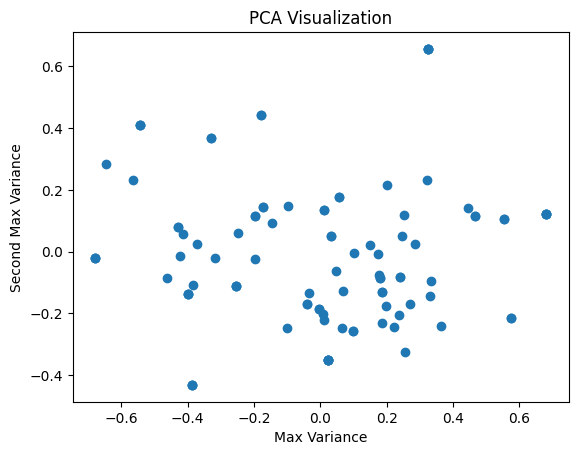

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)

# Detach the tensor to remove it from the computation graph
reduced_embeddings = pca.fit_transform(projected_embeddings.detach().numpy())

# Create a scatter plot
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Max Variance')
plt.ylabel('Second Max Variance')
plt.show()


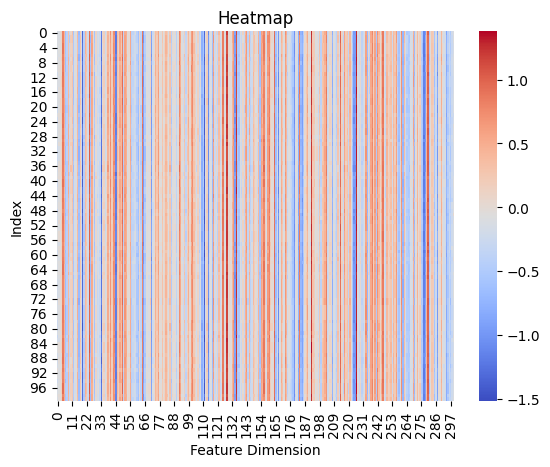

In [17]:
import seaborn as sns

#Creating suitable tensors for conversion to a NumPy array
projected_embeddings_np = projected_embeddings.detach().numpy()

sns.heatmap(projected_embeddings_np, cmap='coolwarm')

plt.title('Heatmap')
plt.xlabel('Feature Dimension')
plt.ylabel('Index')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
# Link:
https://github.com/asakata0821/Aisa_INFO5731_-Fall2023/blob/main/Sakata_Assignment3_CSV.csv





